In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2

In [155]:
df = pd.read_csv('train.csv')
df.shape

(13000, 28)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            13000 non-null  object 
 1   categoryA     13000 non-null  object 
 2   categoryB     13000 non-null  object 
 3   categoryC     13000 non-null  object 
 4   categoryD     13000 non-null  object 
 5   categoryE     13000 non-null  object 
 6   categoryF     13000 non-null  object 
 7   featureA      12936 non-null  float64
 8   featureB      12936 non-null  float64
 9   featureC      12936 non-null  float64
 10  featureD      12936 non-null  float64
 11  featureE      12936 non-null  float64
 12  featureF      13000 non-null  float64
 13  featureG      12936 non-null  float64
 14  featureH      12936 non-null  float64
 15  featureI      12936 non-null  float64
 16  compositionA  12936 non-null  float64
 17  compositionB  12936 non-null  float64
 18  compositionC  12936 non-nu

In [157]:
df.head()

,id,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,...,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,unit,result
0,a563699ca2a601c6ac64aa29986a00a90fb42b48741695...,catA_1,catB_0,catC_718,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_6,0.000458
1,91ab3eb3bcf6c8c1c5fe2da9ba671aa5a48c7369d9a50f...,catA_1,catB_0,catC_1309,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_6,0.000335
2,7128c51c554735d6c81862684ad6005ae12d2edbcd4644...,catA_15,catB_0,catC_1309,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_4,0.054072
3,c8144b52e4f63014de0a0d8e1c629bf0b05cb2696cfc23...,catA_0,catB_0,catC_935,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_5,0.061143
4,88d15a5b2df6692f23d105ff1ae82ae026be00c9271eef...,catA_22,catB_0,catC_1325,catD_0,catE_2,catF_0,-40055.250,4.363288,0.729194,...,14.0,0.0,49.0,3.0,2.0,9.0,16.84,15.0,unit_15,0.015439


In [158]:
df1 = df.drop(['id'],axis=1)
df1.shape

(13000, 27)

In [159]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 20 numerical variables

The numerical variables : ['featureA', 'featureB', 'featureC', 'featureD', 'featureE', 'featureF', 'featureG', 'featureH', 'featureI', 'compositionA', 'compositionB', 'compositionC', 'compositionD', 'compositionE', 'compositionF', 'compositionG', 'compositionH', 'compositionI', 'compositionJ', 'result']


In [160]:
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>1:
    print('The categorical variables :', categorical)

There are 7 categorical variables

The categorical variables : ['categoryA', 'categoryB', 'categoryC', 'categoryD', 'categoryE', 'categoryF', 'unit']


In [161]:
df1[numerical].isnull().sum()

featureA        64
featureB        64
featureC        64
featureD        64
featureE        64
featureF         0
featureG        64
featureH        64
featureI        64
compositionA    64
compositionB    64
compositionC    64
compositionD    64
compositionE    64
compositionF    64
compositionG    64
compositionH    64
compositionI    64
compositionJ    64
result           0
dtype: int64

In [162]:
df1[categorical].isnull().sum()

categoryA    0
categoryB    0
categoryC    0
categoryD    0
categoryE    0
categoryF    0
unit         0
dtype: int64

Removing nulls from numerical!

array([[<AxesSubplot: title={'center': 'featureA'}>,
        <AxesSubplot: title={'center': 'featureB'}>,
        <AxesSubplot: title={'center': 'featureC'}>,
        <AxesSubplot: title={'center': 'featureD'}>],
       [<AxesSubplot: title={'center': 'featureE'}>,
        <AxesSubplot: title={'center': 'featureF'}>,
        <AxesSubplot: title={'center': 'featureG'}>,
        <AxesSubplot: title={'center': 'featureH'}>],
       [<AxesSubplot: title={'center': 'featureI'}>,
        <AxesSubplot: title={'center': 'compositionA'}>,
        <AxesSubplot: title={'center': 'compositionB'}>,
        <AxesSubplot: title={'center': 'compositionC'}>],
       [<AxesSubplot: title={'center': 'compositionD'}>,
        <AxesSubplot: title={'center': 'compositionE'}>,
        <AxesSubplot: title={'center': 'compositionF'}>,
        <AxesSubplot: title={'center': 'compositionG'}>],
       [<AxesSubplot: title={'center': 'compositionH'}>,
        <AxesSubplot: title={'center': 'compositionI'}>,
      

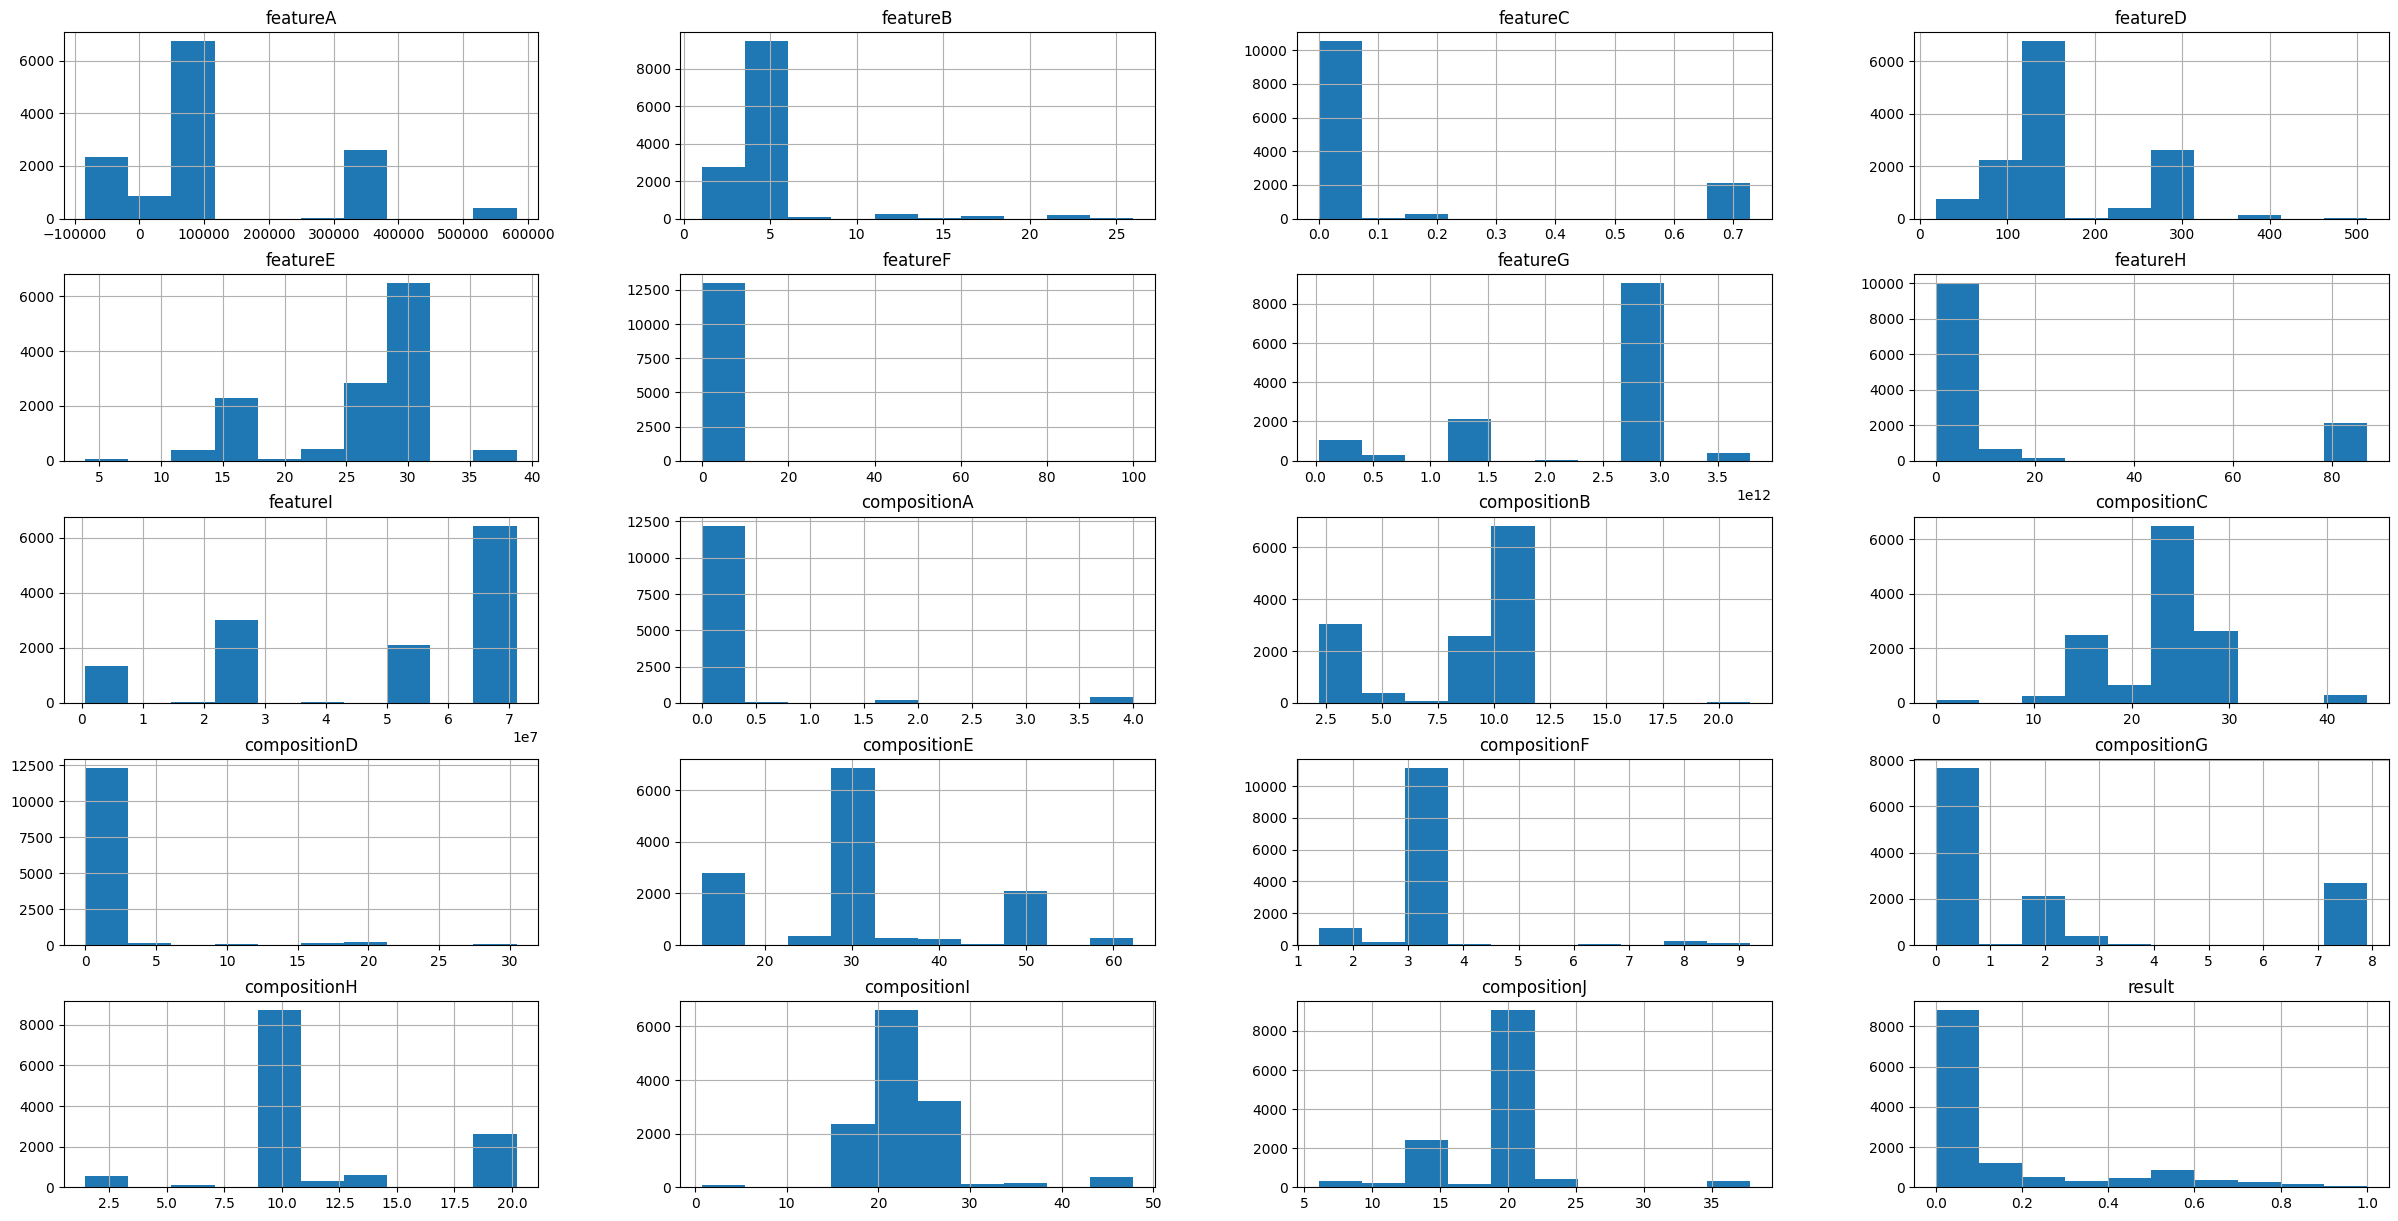

In [163]:
df1[numerical].hist(figsize=(30,15))

We'll replace with mode!

In [164]:
df1[numerical] = df1[numerical].fillna(df1[numerical].mode().iloc[0])

In [165]:
df1[numerical].isnull().sum()

featureA        0
featureB        0
featureC        0
featureD        0
featureE        0
featureF        0
featureG        0
featureH        0
featureI        0
compositionA    0
compositionB    0
compositionC    0
compositionD    0
compositionE    0
compositionF    0
compositionG    0
compositionH    0
compositionI    0
compositionJ    0
result          0
dtype: int64

Creating dummy variables

In [166]:
len(categorical)

7

In [167]:
df1[categorical].nunique()

categoryA     167
categoryB       2
categoryC    2212
categoryD       3
categoryE      25
categoryF       3
unit           19
dtype: int64

In [168]:
df2 = df1.drop(['categoryA','categoryC','categoryE'],axis=1)

In [169]:
categorical.remove('categoryA')
categorical.remove('categoryC')
categorical.remove('categoryE')

In [170]:
df2 = pd.get_dummies(data=df2,columns=categorical,drop_first=True)
df1.shape, df2.shape

((13000, 27), (13000, 43))

Outlier analysis

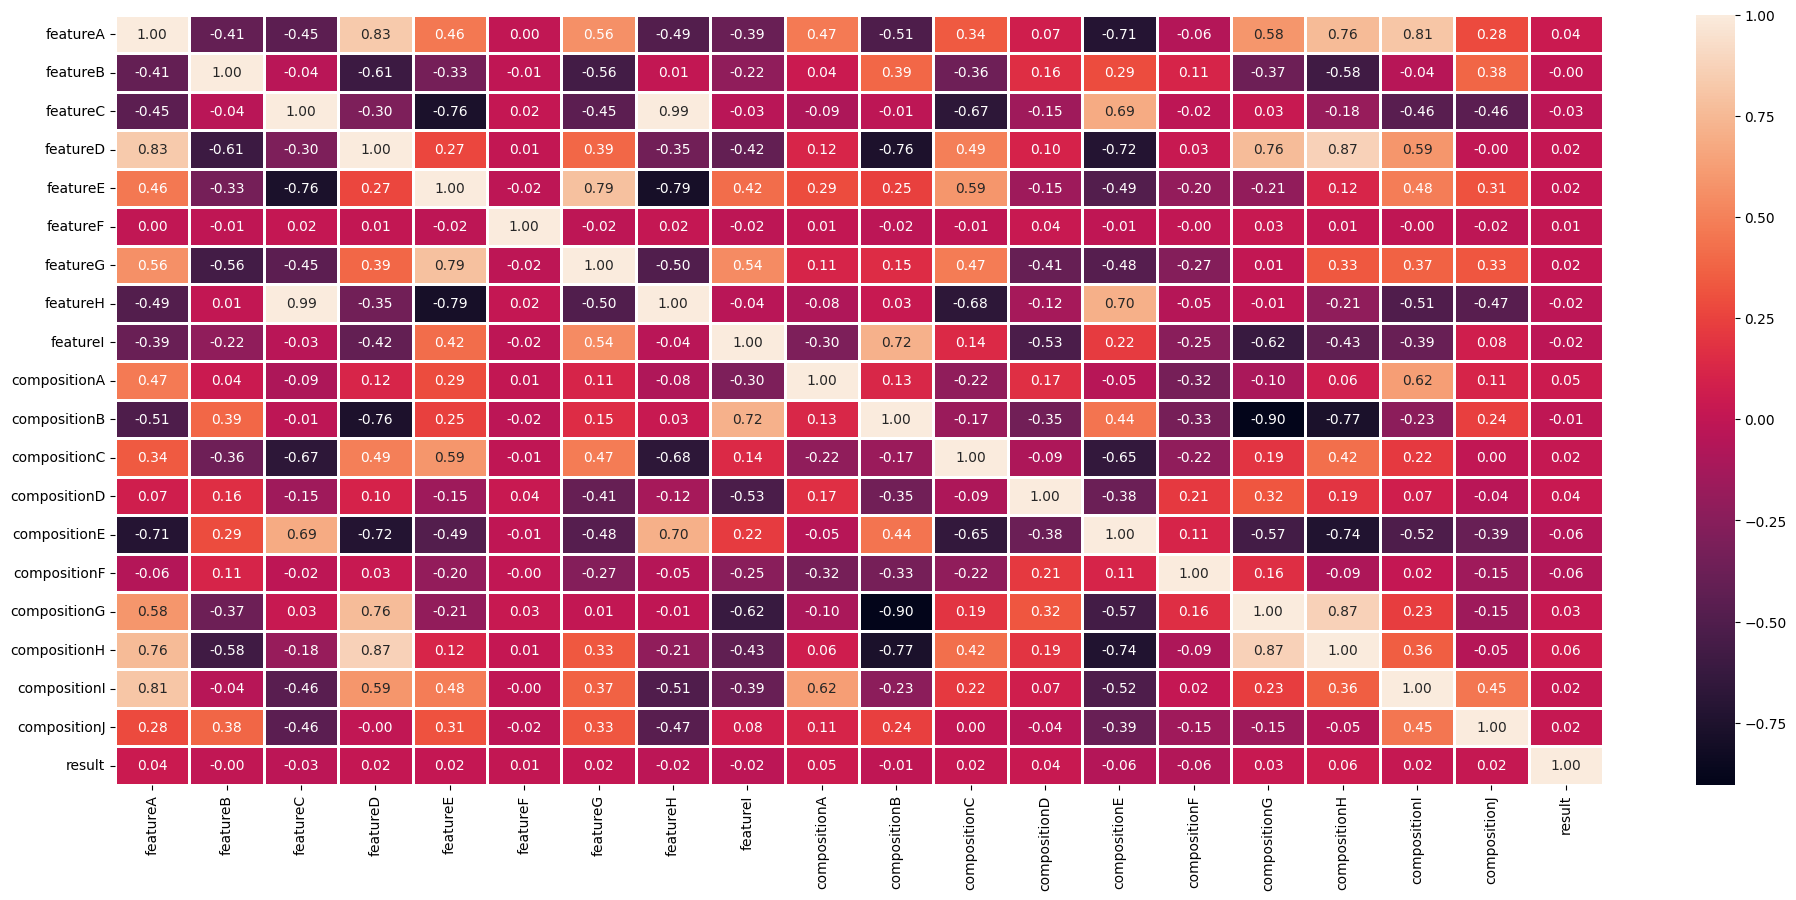

In [171]:
plt.figure(figsize=(24,10))
sns.heatmap(df2[numerical].corr(),annot=True,fmt='.2f',linewidths=2)
plt.show()

In [172]:
numerical.remove('result')

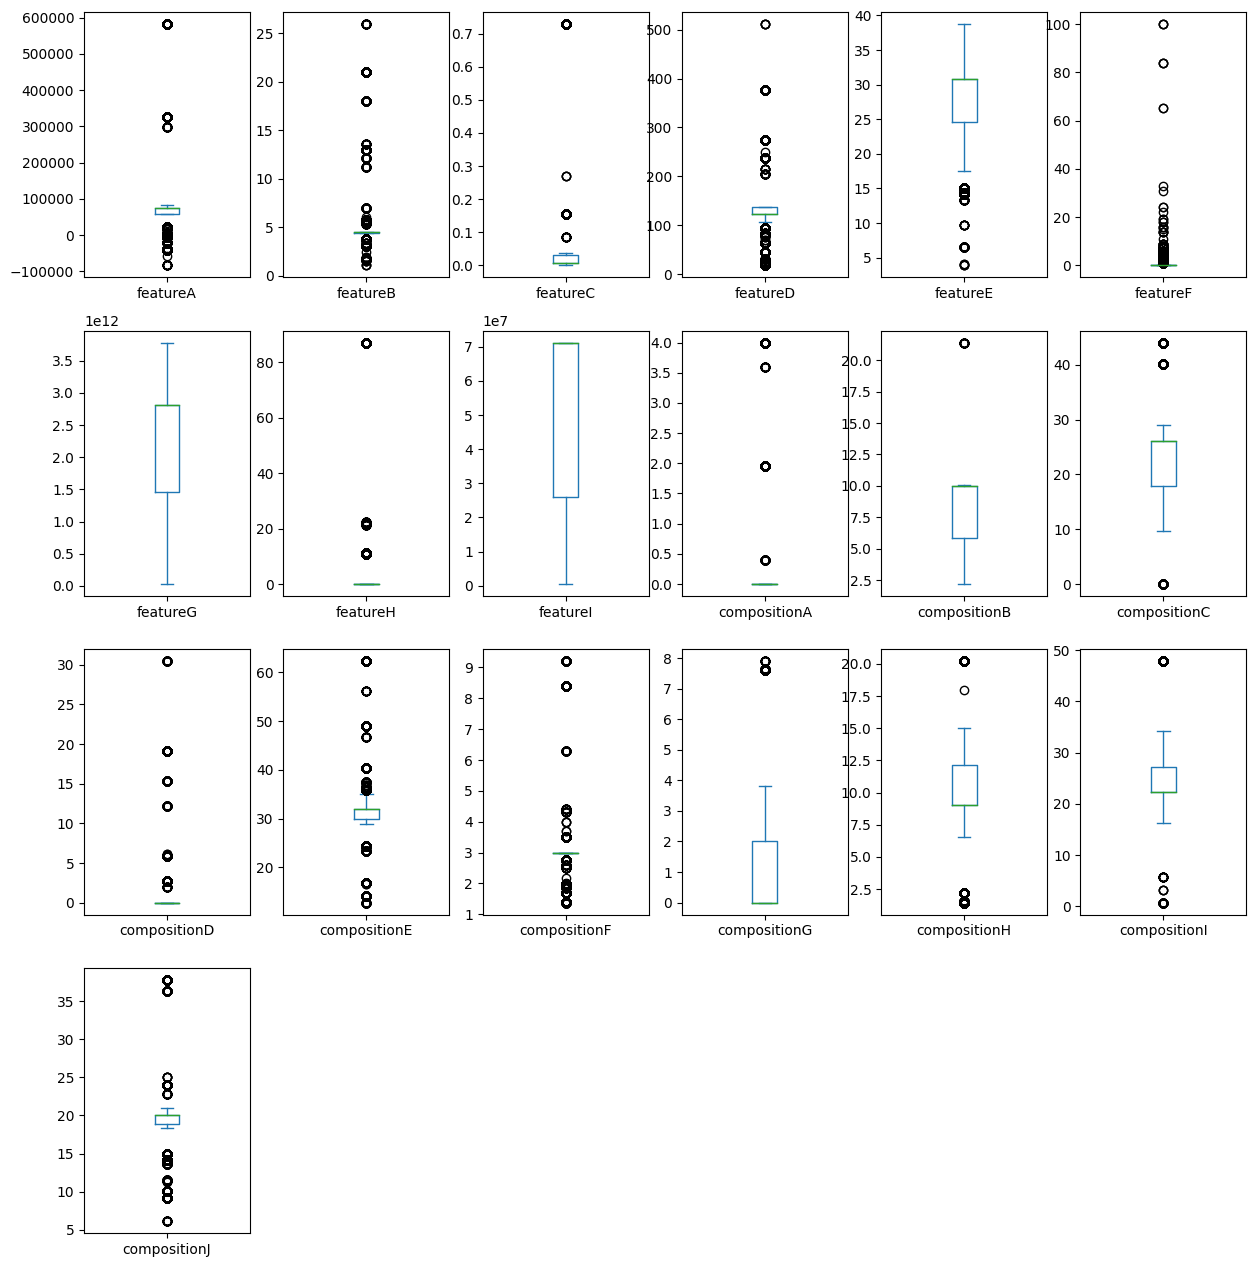

In [173]:
df2[numerical].plot(kind = "box",subplots = True,layout = (5,6),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [174]:
#Using the InterQuartile Range to fill the values
def remove_outlier(i , col):
    Q1 = i[col].quantile(0.25)
    Q3 = i[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df2[col] = np.clip(i[col] , lower_whisker , upper_whisker)
    return i

def treat_outliers_all(df , col_list):
    for c in col_list:
        i = remove_outlier(df , c)
    return i

In [175]:
df3 = treat_outliers_all(df2 , numerical)

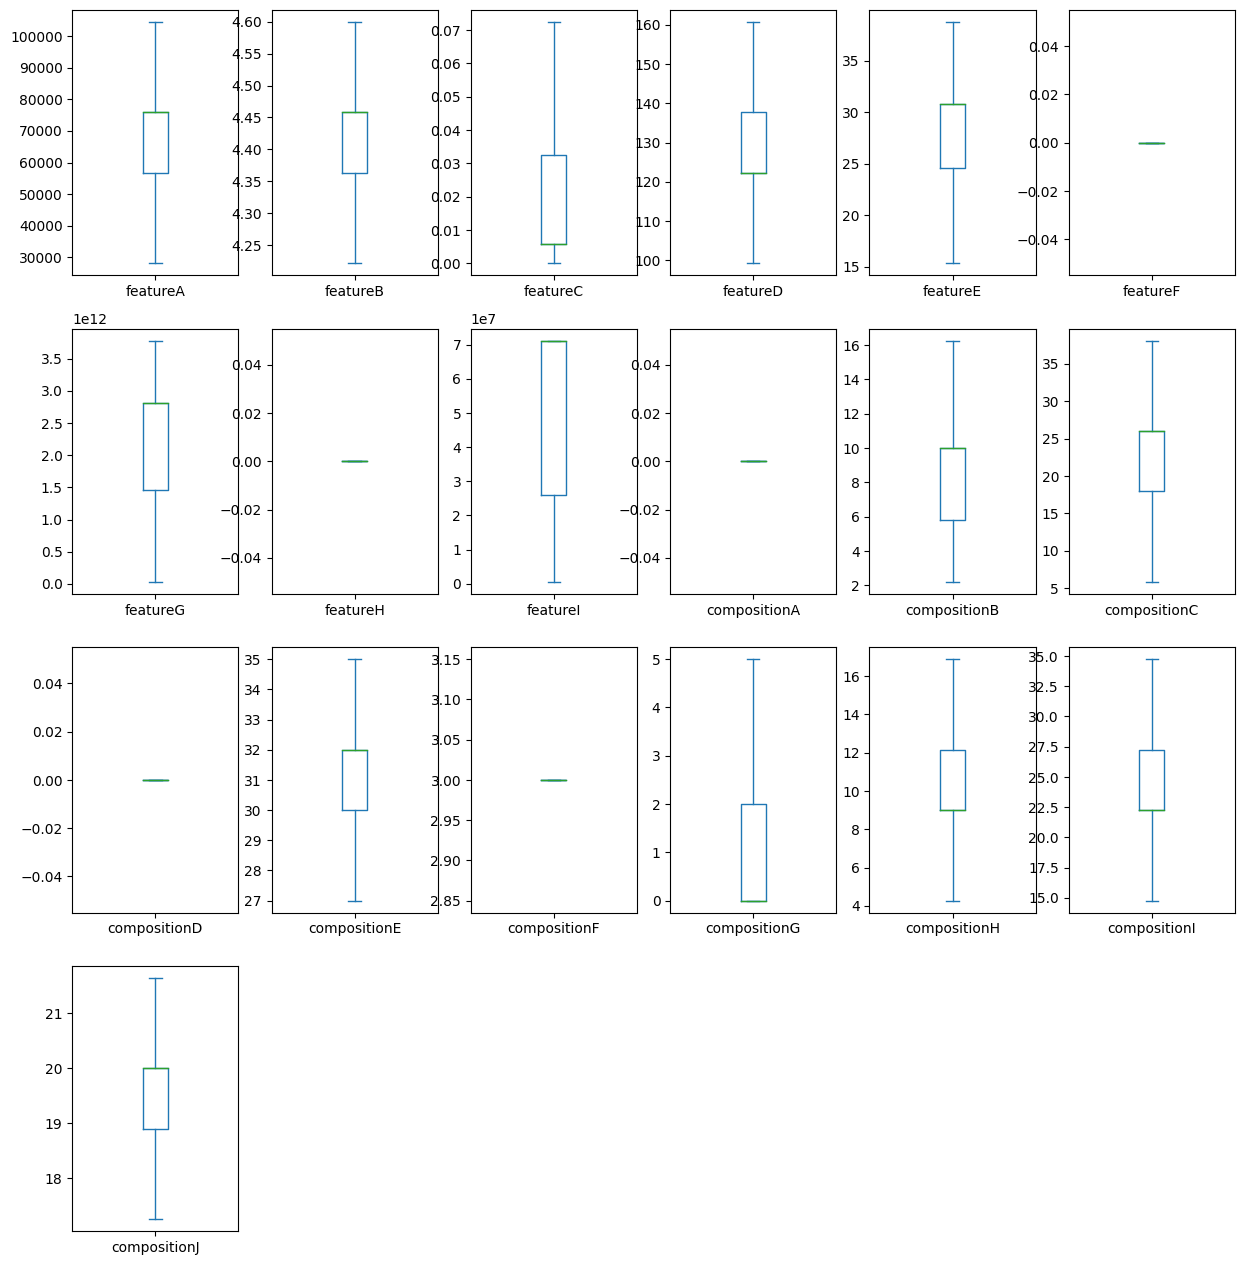

In [176]:
df3[numerical].plot(kind = "box",subplots = True,layout = (5,6),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

Feature Engineering

In [281]:
X = df3.drop(['result'],axis=1)
y = df3.result

X.shape, y.shape

((13000, 42), (13000,))

In [282]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10400, 42), (2600, 42), (10400,), (2600,))

In [246]:
from sklearn.linear_model import LinearRegression

# initialize the linear regression model
reg = LinearRegression()

# Train the model with our training data
reg.fit(X_train, y_train)

LinearRegression()

In [247]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [248]:
y_pred_lin = reg.predict(X_test)

In [249]:
y_pred_lin

array([ 0.01940962,  0.01688817,  0.50218132, ..., -0.01109152,
        0.05402515,  0.08072057])

In [250]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score,mean_squared_log_error
from math import sqrt

mae_ln = mean_absolute_error(y_test,y_pred_lin)
rmse_ln = sqrt(mean_squared_error(y_test,y_pred_lin))
# rmsle_ln = sqrt(mean_squared_log_error(y_test,y_pred_lin))
r_sq_ln = r2_score(y_test,y_pred_lin)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_ln,3),round(rmse_ln,3),round(r_sq_ln,3)))

Mean Absolute Error: 0.05
Root Mean Square Error: 0.084
R2 Score: 0.867


Random Forests

In [283]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [284]:
X_train_RF.shape, X_test_RF.shape

((10400, 42), (2600, 42))

In [253]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train_RF,y_train)

RandomForestRegressor(n_estimators=10)

In [254]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [255]:
y_pred_RF = rf.predict(X_test_RF)

In [259]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_rf = mean_absolute_error(y_test,y_pred_RF)
rmse_rf = sqrt(mean_squared_error(y_test,y_pred_RF))
rmsle_rf = sqrt(mean_squared_log_error(y_test,y_pred_RF))
r_sq_rf = r2_score(y_test,y_pred_RF)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}\nRoot Mean Square Log Error: {3}".format(round(mae_rf,3),round(rmse_rf,3),round(r_sq_rf,3),round(rmsle_rf,3)))

Mean Absolute Error: 0.047
Root Mean Square Error: 0.081
R2 Score: 0.877
Root Mean Square Log Error: 0.062


With 100 trees

In [190]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_RF,y_train)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [191]:
y_pred_RF_100 = rf.predict(X_test_RF)
# print(y_pred_RF_100)

In [192]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_rf100 = mean_absolute_error(y_test,y_pred_RF_100)
rmse_rf100 = sqrt(mean_squared_error(y_test,y_pred_RF_100))
rmsle_rf_100 = sqrt(mean_squared_log_error(y_test,y_pred_RF_100))
r_sq_rf100 = r2_score(y_test,y_pred_RF_100)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}\nRoot Mean Square Log Error: {3}".format(round(mae_rf100,3),round(rmse_rf100,3),round(r_sq_rf100,3),round(rmsle_rf_100,3)))

Mean Absolute Error: 0.047
Root Mean Square Error: 0.08
R2 Score: 0.88
Root Mean Square Log Error: 0.062


RF CV

In [193]:
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}
regr = RandomForestRegressor(random_state=12)

clf = GridSearchCV(regr, parameters,verbose=10,n_jobs=6,cv=3)
clf.fit(X_train_RF, y_train)
print("Best params: ", clf.best_params_)

Fitting 3 folds for each of 189 candidates, totalling 567 fits
Best params:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}


In [194]:
print("Best params: ", clf.best_params_)

Best params:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}


In [285]:
y_pred_RF_cv = clf.best_estimator_.predict(X_test_RF)

In [286]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_rf_cv = mean_absolute_error(y_test,y_pred_RF_cv)
rmse_rf_cv = sqrt(mean_squared_error(y_test,y_pred_RF_cv))
rmsle_rf_cv = sqrt(mean_squared_log_error(y_test,y_pred_RF_cv))
r_sq_rf_cv = r2_score(y_test,y_pred_RF_cv)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}\nRoot Mean Square Log Error: {3}".format(round(mae_rf_cv,3),round(rmse_rf_cv,3),round(r_sq_rf_cv,3),round(rmsle_rf_cv,3)))

Mean Absolute Error: 0.047
Root Mean Square Error: 0.08
R2 Score: 0.881
Root Mean Square Log Error: 0.061


On test data

In [197]:
test_data = pd.read_csv('test.csv')
test_df = test_data.drop(['id'],axis=1)
test_df.shape

(7000, 26)

In [198]:
numerical = [var for var in test_df.columns if test_df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 19 numerical variables

The numerical variables : ['featureA', 'featureB', 'featureC', 'featureD', 'featureE', 'featureF', 'featureG', 'featureH', 'featureI', 'compositionA', 'compositionB', 'compositionC', 'compositionD', 'compositionE', 'compositionF', 'compositionG', 'compositionH', 'compositionI', 'compositionJ']


In [199]:
categorical = [var for var in test_df.columns if test_df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>1:
    print('The categorical variables :', categorical)

There are 7 categorical variables

The categorical variables : ['categoryA', 'categoryB', 'categoryC', 'categoryD', 'categoryE', 'categoryF', 'unit']


In [200]:
test_df[numerical].isnull().sum()

featureA        43
featureB        43
featureC        43
featureD        43
featureE        43
featureF         0
featureG        43
featureH        43
featureI        43
compositionA    43
compositionB    43
compositionC    43
compositionD    43
compositionE    43
compositionF    43
compositionG    43
compositionH    43
compositionI    43
compositionJ    43
dtype: int64

In [201]:
test_df[categorical].isnull().sum()

categoryA    0
categoryB    0
categoryC    0
categoryD    0
categoryE    0
categoryF    0
unit         0
dtype: int64

We'll replace with mode of training data!

In [202]:
test_df[numerical] = test_df[numerical].fillna(df1[numerical].mode().iloc[0])

In [203]:
test_df[numerical].isnull().sum()

featureA        0
featureB        0
featureC        0
featureD        0
featureE        0
featureF        0
featureG        0
featureH        0
featureI        0
compositionA    0
compositionB    0
compositionC    0
compositionD    0
compositionE    0
compositionF    0
compositionG    0
compositionH    0
compositionI    0
compositionJ    0
dtype: int64

Creating dummy variables

In [204]:
len(categorical)

7

In [205]:
test_df[categorical].nunique()

categoryA     140
categoryB       2
categoryC    1755
categoryD       3
categoryE      25
categoryF       3
unit           19
dtype: int64

In [206]:
test_df_2 = test_df.drop(['categoryA','categoryC','categoryE'],axis=1)

In [207]:
categorical.remove('categoryA')
categorical.remove('categoryC')
categorical.remove('categoryE')

In [208]:
test_df_2 = pd.get_dummies(data=test_df_2,columns=categorical,drop_first=True)
test_df.shape, test_df_2.shape

((7000, 26), (7000, 42))

In [209]:
test_df_2[numerical].describe()

,featureA,featureB,featureC,featureD,featureE,featureF,featureG,featureH,featureI,compositionA,compositionB,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.0,7.000000e+03,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,109623.740268,4.884873,0.123821,148.901374,25.851582,0.0,2.200193e+12,14.420843,4.746460e+07,0.148354,7.595534,23.336226,1.304820,32.401511,3.227127,2.152721,11.178613,23.170859,18.838573
std,140734.100795,3.864040,0.253418,77.429941,6.987465,0.0,9.906728e+11,30.667360,2.560947e+07,0.707692,3.400634,6.743383,3.517799,11.700098,1.182283,3.093873,4.965172,5.976681,4.515299
min,-83749.750000,1.728675,0.000000,14.548292,4.042465,0.0,2.887150e+10,0.000000,5.300380e+05,0.000000,2.200000,0.000000,0.000000,12.780000,1.380000,0.000000,1.450000,0.760000,5.000000
25%,21256.750000,4.363288,0.005718,107.127967,21.999092,0.0,1.464509e+12,0.000000,2.586796e+07,0.000000,4.600000,16.720000,0.000000,30.000000,3.000000,0.000000,9.000000,22.260000,18.380000
50%,75808.375000,4.457840,0.005718,122.299437,28.293704,0.0,2.757620e+12,0.000000,5.094169e+07,0.000000,9.240000,26.000000,0.000000,32.000000,3.000000,0.000000,9.000000,22.260000,20.000000
75%,75808.375000,4.457840,0.032407,137.657705,30.831906,0.0,2.806036e+12,0.000000,7.117635e+07,0.000000,10.000000,26.000000,2.700000,34.400000,3.500000,2.370000,12.400000,27.250000,20.000000
max,582211.000000,25.982190,0.729194,377.379590,38.767234,0.0,3.781699e+12,87.158924,7.117635e+07,6.000000,21.400000,44.050000,30.460000,62.300000,9.200000,17.210000,22.900000,47.830000,37.830000


In [210]:
df2[numerical].describe()

,featureA,featureB,featureC,featureD,featureE,featureF,featureG,featureH,featureI,compositionA,compositionB,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ
count,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.0,1.300000e+04,13000.0,1.300000e+04,13000.0,13000.000000,13000.000000,13000.0,13000.000000,13000.0,13000.000000,13000.000000,13000.000000,13000.000000
mean,70484.336740,4.398611,0.024040,126.839158,26.602352,0.0,2.337682e+12,0.0,5.030535e+07,0.0,7.709221,23.601825,0.0,31.397246,3.0,1.476988,10.640003,23.076872,19.232232
std,26876.934473,0.115787,0.025594,21.595552,6.382068,0.0,8.921355e+11,0.0,2.410888e+07,0.0,3.168910,5.988165,0.0,2.799586,0.0,1.967394,3.435061,4.243873,1.249708
min,28149.312500,4.221460,0.000000,99.262035,15.315898,0.0,2.887150e+10,0.0,5.300380e+05,0.0,2.200000,5.825000,0.0,27.000000,3.0,0.000000,4.275000,14.775000,17.250000
25%,56744.750000,4.363288,0.005718,122.299437,24.625503,0.0,1.464509e+12,0.0,2.586796e+07,0.0,5.830000,17.930000,0.0,30.000000,3.0,0.000000,9.000000,22.260000,18.900000
50%,75808.375000,4.457840,0.005718,122.299437,30.831906,0.0,2.806036e+12,0.0,7.117635e+07,0.0,10.000000,26.000000,0.0,32.000000,3.0,0.000000,9.000000,22.260000,20.000000
75%,75808.375000,4.457840,0.032407,137.657705,30.831906,0.0,2.806036e+12,0.0,7.117635e+07,0.0,10.000000,26.000000,0.0,32.000000,3.0,2.000000,12.150000,27.250000,20.000000
max,104403.812500,4.599669,0.072441,160.695107,38.767234,0.0,3.781699e+12,0.0,7.117635e+07,0.0,16.255000,38.105000,0.0,35.000000,3.0,5.000000,16.875000,34.735000,21.650000


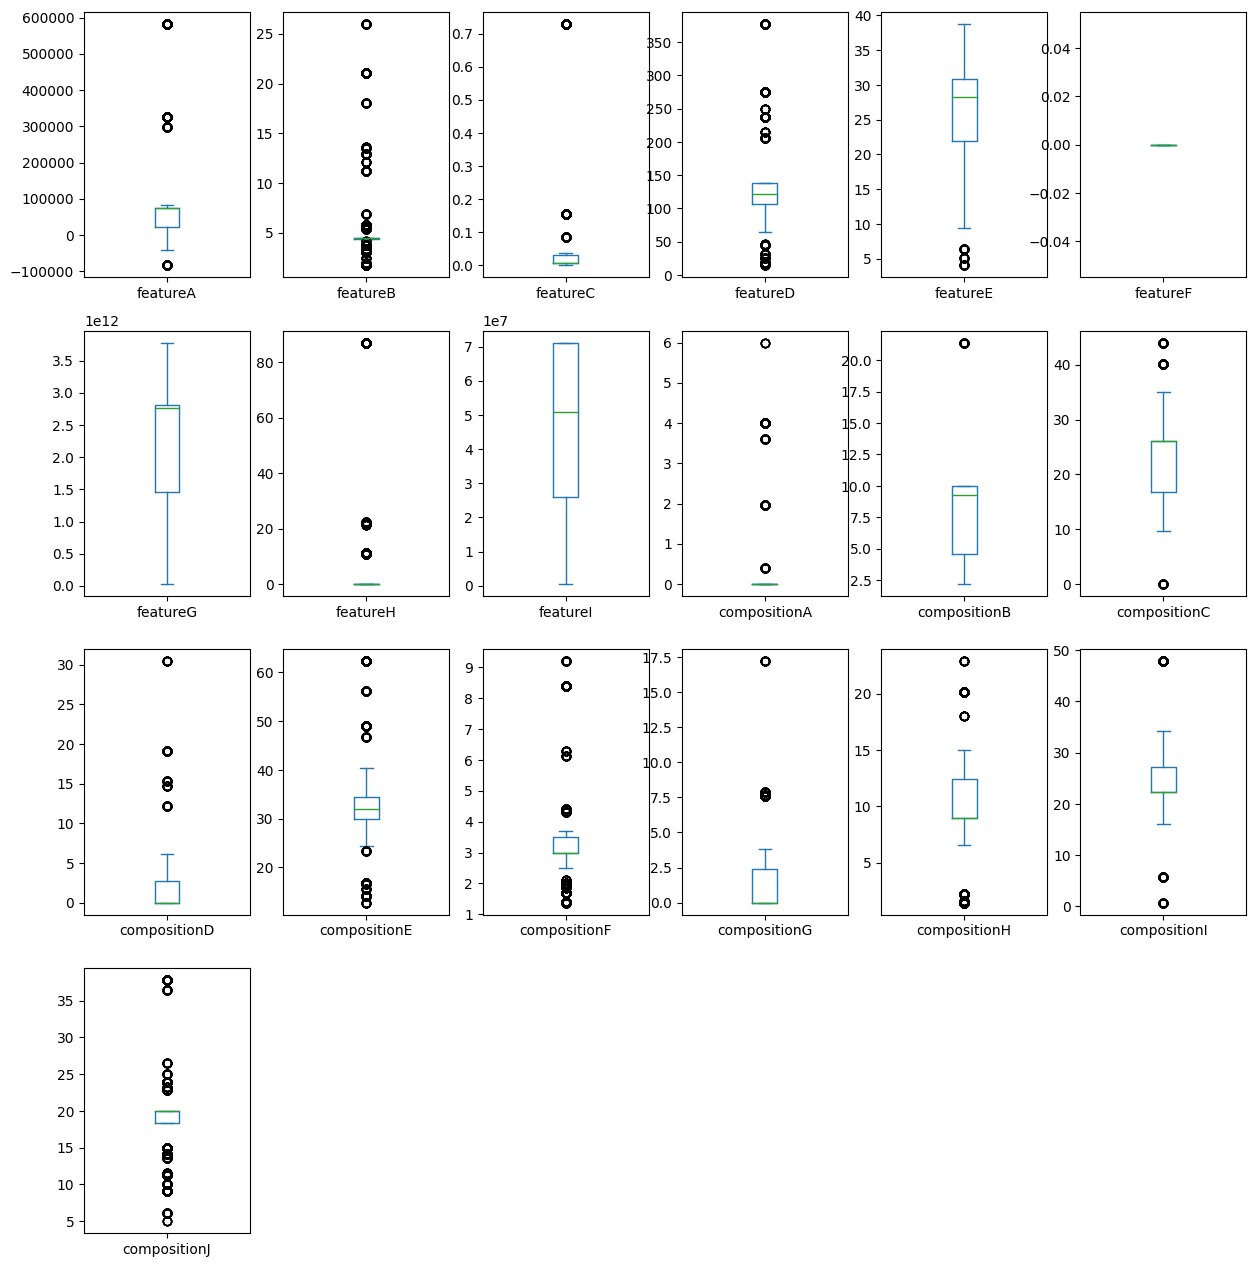

In [211]:
test_df_2[numerical].plot(kind = "box",subplots = True,layout = (5,6),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [212]:
#Using the InterQuartile Range to fill the values
def remove_outlier(i , col):
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    test_df_2[col] = np.clip(i[col] , lower_whisker , upper_whisker)
    return i

def treat_outliers_all(df , col_list):
    for c in col_list:
        i = remove_outlier(df , c)
    return i

In [213]:
test_df_3 = treat_outliers_all(test_df_2 , numerical)

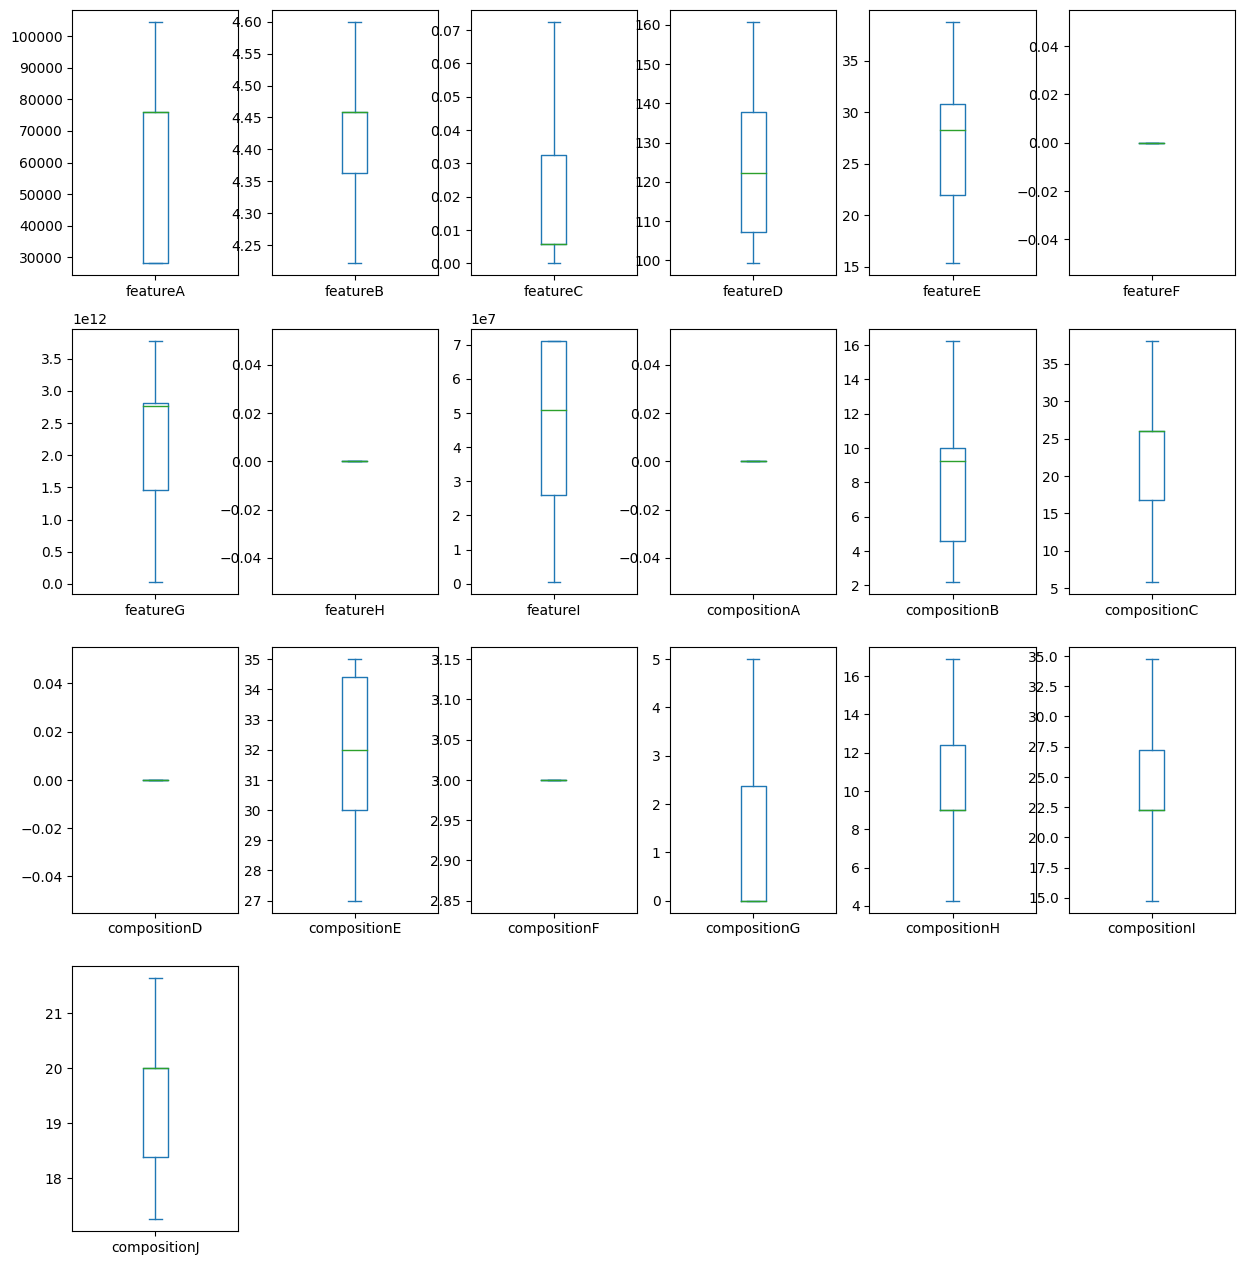

In [214]:
test_df_3[numerical].plot(kind = "box",subplots = True,layout = (5,6),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [215]:
test_df_3.describe()

,featureA,featureB,featureC,featureD,featureE,featureF,featureG,featureH,featureI,compositionA,...,unit_unit_17,unit_unit_18,unit_unit_2,unit_unit_3,unit_unit_4,unit_unit_5,unit_unit_6,unit_unit_7,unit_unit_8,unit_unit_9
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.0,7.000000e+03,7000.0,7.000000e+03,7000.0,...,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,68936.242482,4.405472,0.024273,126.458021,26.139334,0.0,2.200193e+12,0.0,4.746460e+07,0.0,...,0.000286,0.000286,0.095143,0.088000,0.069714,0.064143,0.059000,0.052857,0.057857,0.063143
std,27525.692991,0.123133,0.025956,22.026408,6.378759,0.0,9.906728e+11,0.0,2.560947e+07,0.0,...,0.016902,0.016902,0.293433,0.283315,0.254683,0.245025,0.235642,0.223764,0.233490,0.243237
min,28149.312500,4.221460,0.000000,99.262035,15.315898,0.0,2.887150e+10,0.0,5.300380e+05,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28149.312500,4.363288,0.005718,107.127967,21.999092,0.0,1.464509e+12,0.0,2.586796e+07,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75808.375000,4.457840,0.005718,122.299437,28.293704,0.0,2.757620e+12,0.0,5.094169e+07,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75808.375000,4.457840,0.032407,137.657705,30.831906,0.0,2.806036e+12,0.0,7.117635e+07,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,104403.812500,4.599669,0.072441,160.695107,38.767234,0.0,3.781699e+12,0.0,7.117635e+07,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [216]:
df2.describe()

,featureA,featureB,featureC,featureD,featureE,featureF,featureG,featureH,featureI,compositionA,...,unit_unit_17,unit_unit_18,unit_unit_2,unit_unit_3,unit_unit_4,unit_unit_5,unit_unit_6,unit_unit_7,unit_unit_8,unit_unit_9
count,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.0,1.300000e+04,13000.0,1.300000e+04,13000.0,...,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000
mean,70484.336740,4.398611,0.024040,126.839158,26.602352,0.0,2.337682e+12,0.0,5.030535e+07,0.0,...,0.000538,0.000308,0.077231,0.076385,0.074000,0.064615,0.065615,0.060538,0.056923,0.051385
std,26876.934473,0.115787,0.025594,21.595552,6.382068,0.0,8.921355e+11,0.0,2.410888e+07,0.0,...,0.023199,0.017539,0.266968,0.265623,0.261781,0.245855,0.247618,0.238491,0.231704,0.220789
min,28149.312500,4.221460,0.000000,99.262035,15.315898,0.0,2.887150e+10,0.0,5.300380e+05,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56744.750000,4.363288,0.005718,122.299437,24.625503,0.0,1.464509e+12,0.0,2.586796e+07,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75808.375000,4.457840,0.005718,122.299437,30.831906,0.0,2.806036e+12,0.0,7.117635e+07,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75808.375000,4.457840,0.032407,137.657705,30.831906,0.0,2.806036e+12,0.0,7.117635e+07,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,104403.812500,4.599669,0.072441,160.695107,38.767234,0.0,3.781699e+12,0.0,7.117635e+07,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Minimum and maximum ranges of test data clipped from train data!! :)

Now predicting

In [217]:
sample = pd.read_csv('sample_submission.csv')

In [218]:
sample.head()

,id,result
0,939edadbc8e0cddf21c8c5710c4f2f909abd36c196aee8...,0.0
1,fcfed000585350fdc6a982bd1146cd8cdd71d989a2fb01...,0.0
2,917b412b73b7c1c83f779d2f350acda4d2b14804579e79...,0.0
3,012d646dbd712fd4b752aa8761dc18aaf28643c262f859...,0.0
4,77c69c2a873444dfef22131bada7d9504ad731ca8df55d...,0.0


In [233]:
y_pred = clf.best_estimator_.predict(test_df_3)
y_pred

array([0.712284  , 0.71254015, 0.31706831, ..., 0.0617836 , 0.07458709,
       0.01804286])

In [220]:
submission = pd.DataFrame({'id':sample.id,'result':y_pred})
submission.head()

,id,result
0,939edadbc8e0cddf21c8c5710c4f2f909abd36c196aee8...,0.712284
1,fcfed000585350fdc6a982bd1146cd8cdd71d989a2fb01...,0.712540
2,917b412b73b7c1c83f779d2f350acda4d2b14804579e79...,0.317068
3,012d646dbd712fd4b752aa8761dc18aaf28643c262f859...,0.085792
4,77c69c2a873444dfef22131bada7d9504ad731ca8df55d...,0.074273


In [221]:
submission.to_csv('submission_rfcv.csv',index=False)

Doing it on testdf2 without outlier removal

In [132]:
y_pred = clf.best_estimator_.predict(test_df_2)
y_pred

array([0.712284  , 0.71254015, 0.30584976, ..., 0.06163522, 0.07458709,
       0.01804286])

In [133]:
submission = pd.DataFrame({'id':sample.id,'result':y_pred})
submission.head()

,id,result
0,939edadbc8e0cddf21c8c5710c4f2f909abd36c196aee8...,0.712284
1,fcfed000585350fdc6a982bd1146cd8cdd71d989a2fb01...,0.712540
2,917b412b73b7c1c83f779d2f350acda4d2b14804579e79...,0.305850
3,012d646dbd712fd4b752aa8761dc18aaf28643c262f859...,0.085792
4,77c69c2a873444dfef22131bada7d9504ad731ca8df55d...,0.072934


In [134]:
submission.to_csv('submission_rfcv_nooutlier.csv',index=False)

Training new RF model without outlier removal on train data

In [143]:
X = df2.drop(['result'],axis=1)
y = df2.result

X.shape, y.shape

((13000, 42), (13000,))

In [144]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10400, 42), (2600, 42), (10400,), (2600,))

Random Forests

In [145]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [146]:
X_train_RF.shape, X_test_RF.shape

((10400, 42), (2600, 42))

In [147]:
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}
regr = RandomForestRegressor(random_state=12)

clf = GridSearchCV(regr, parameters,verbose=10,n_jobs=6,cv=3)
clf.fit(X_train_RF, y_train)
print("Best params: ", clf.best_params_)

Fitting 3 folds for each of 189 candidates, totalling 567 fits
Best params:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1000}


In [148]:
print("Best params: ", clf.best_params_)

Best params:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1000}


In [149]:
y_pred_RF_cv = clf.best_estimator_.predict(X_test_RF)

In [150]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_rf_cv = mean_absolute_error(y_test,y_pred_RF_cv)
rmse_rf_cv = sqrt(mean_squared_error(y_test,y_pred_RF_cv))
rmsle_rf_cv = sqrt(mean_squared_log_error(y_test,y_pred_RF_cv))
r_sq_rf_cv = r2_score(y_test,y_pred_RF_cv)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}\nRoot Mean Square Log Error: {3}".format(round(mae_rf_cv,3),round(rmse_rf_cv,3),round(r_sq_rf_cv,3),round(rmsle_rf_cv,3)))

Mean Absolute Error: 0.046
Root Mean Square Error: 0.079
R2 Score: 0.883
Root Mean Square Log Error: 0.061


In [151]:
y_pred = clf.best_estimator_.predict(test_df_2)
y_pred

array([0.66923004, 0.68205747, 0.27181495, ..., 0.06640546, 0.09208009,
       0.02391893])

In [152]:
submission = pd.DataFrame({'id':sample.id,'result':y_pred})
submission.head()

,id,result
0,939edadbc8e0cddf21c8c5710c4f2f909abd36c196aee8...,0.669230
1,fcfed000585350fdc6a982bd1146cd8cdd71d989a2fb01...,0.682057
2,917b412b73b7c1c83f779d2f350acda4d2b14804579e79...,0.271815
3,012d646dbd712fd4b752aa8761dc18aaf28643c262f859...,0.099536
4,77c69c2a873444dfef22131bada7d9504ad731ca8df55d...,0.089542


In [153]:
submission.to_csv('submission_rfcv_nooutlier_eventrain.csv',index=False)

Worse accuracy

Feature Selection Time!

In [287]:
clf

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=12), n_jobs=6,
             param_grid={'bootstrap': [True], 'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200, 250, 300, 500, 1000]},
             verbose=10)

In [288]:
import pandas as pd
from sklearn.feature_selection import SelectFromModel

In [289]:
sel = SelectFromModel(clf.best_estimator_)
sel.fit(X_train_RF, y_train)

SelectFromModel(estimator=RandomForestRegressor(min_samples_split=10,
                                                n_estimators=1000,
                                                random_state=12))

In [290]:
sel.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False])

In [291]:
selected_feat= X_train_RF.columns[(sel.get_support())]
len(selected_feat)

4

In [292]:
print(selected_feat)

Index(['unit_unit_10', 'unit_unit_12', 'unit_unit_7', 'unit_unit_8'], dtype='object')


In [295]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

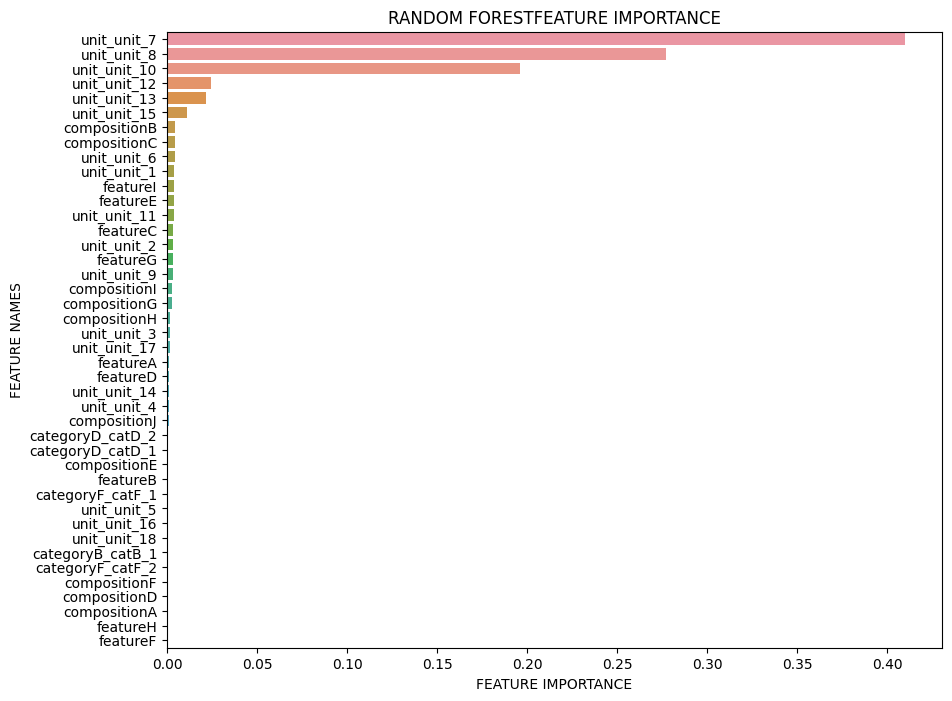

In [296]:
plot_feature_importance(clf.best_estimator_.feature_importances_,X_train_RF.columns,'RANDOM FOREST')

In [298]:
features = ['unit_unit_10', 'unit_unit_12', 'unit_unit_7', 'unit_unit_8']

In [304]:
X = df3[['unit_unit_10', 'unit_unit_12', 'unit_unit_7', 'unit_unit_8']]
y = df3.result

X.shape, y.shape

((13000, 4), (13000,))

In [305]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10400, 4), (2600, 4), (10400,), (2600,))

In [306]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [307]:
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}
regr = RandomForestRegressor(random_state=12)

clf = GridSearchCV(regr, parameters,verbose=10,n_jobs=6,cv=3)
clf.fit(X_train_RF, y_train)
print("Best params: ", clf.best_params_)

Fitting 3 folds for each of 189 candidates, totalling 567 fits
Best params:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [308]:
print("Best params: ", clf.best_params_)

Best params:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [309]:
y_pred_RF_cv = clf.best_estimator_.predict(X_test_RF)

In [310]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_rf_cv = mean_absolute_error(y_test,y_pred_RF_cv)
rmse_rf_cv = sqrt(mean_squared_error(y_test,y_pred_RF_cv))
rmsle_rf_cv = sqrt(mean_squared_log_error(y_test,y_pred_RF_cv))
r_sq_rf_cv = r2_score(y_test,y_pred_RF_cv)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}\nRoot Mean Square Log Error: {3}".format(round(mae_rf_cv,3),round(rmse_rf_cv,3),round(r_sq_rf_cv,3),round(rmsle_rf_cv,3)))

Mean Absolute Error: 0.064
Root Mean Square Error: 0.095
R2 Score: 0.83
Root Mean Square Log Error: 0.075


In [311]:
test_df_feat = test_df_3[features]
y_pred = clf.best_estimator_.predict(test_df_feat)
y_pred

array([0.66645257, 0.66645257, 0.24749685, ..., 0.05350222, 0.05350222,
       0.05350222])

In [312]:
submission = pd.DataFrame({'id':sample.id,'result':y_pred})
submission.head()

,id,result
0,939edadbc8e0cddf21c8c5710c4f2f909abd36c196aee8...,0.666453
1,fcfed000585350fdc6a982bd1146cd8cdd71d989a2fb01...,0.666453
2,917b412b73b7c1c83f779d2f350acda4d2b14804579e79...,0.247497
3,012d646dbd712fd4b752aa8761dc18aaf28643c262f859...,0.053502
4,77c69c2a873444dfef22131bada7d9504ad731ca8df55d...,0.053502


In [ ]:
submission.to_csv('submission_rfcv_featuresel.csv',index=False)